# Analisis datos mediante el timpo

Los primeros datos se mostraran como a avanzado la salud mental desde el 2016 hasta el dia de hoy


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./data_health/dforwho.csv')
for p in df.columns:
    print('>', p)

> Country
> Year
> Government expenditures on mental hospitals as a percentage of total government expenditures on mental health (%)
> Stand-alone law for mental health
> Year the law was enacted (latest revision)
> Stand-alone policy or plan for mental health
> Publication year of the policy or plan (latest revision)


In [6]:
df.head()

,Country,Year,Government expenditures on mental hospitals as a percentage of total government expenditures on mental health (%),Stand-alone law for mental health,Year the law was enacted (latest revision),Stand-alone policy or plan for mental health,Publication year of the policy or plan (latest revision)
0,Afghanistan,2016,NaN,Yes,1987,Yes,2016.0
1,Afghanistan,2014,NaN,Yes,NaN,Yes,NaN
2,Albania,2016,NaN,Yes,2012,Yes,2013.0
3,Albania,2014,NaN,Yes,NaN,Yes,NaN
4,Algeria,2016,NaN,Yes,1905,No,NaN


In [7]:
# change the name of the columns
result = df.rename(columns={'Government expenditures on mental hospitals as a percentage of total government expenditures on mental health (%)':
                            'government_investment'})
# this is for select only
co = result.dropna(subset=['government_investment'], how='all')
contribution = co[['Country', 'government_investment']]
# select just the 10 most contribution 
most_contribution = contribution.sort_values('government_investment',ascending=False).head(10)


## This show which countrys were the ones who contributed the most

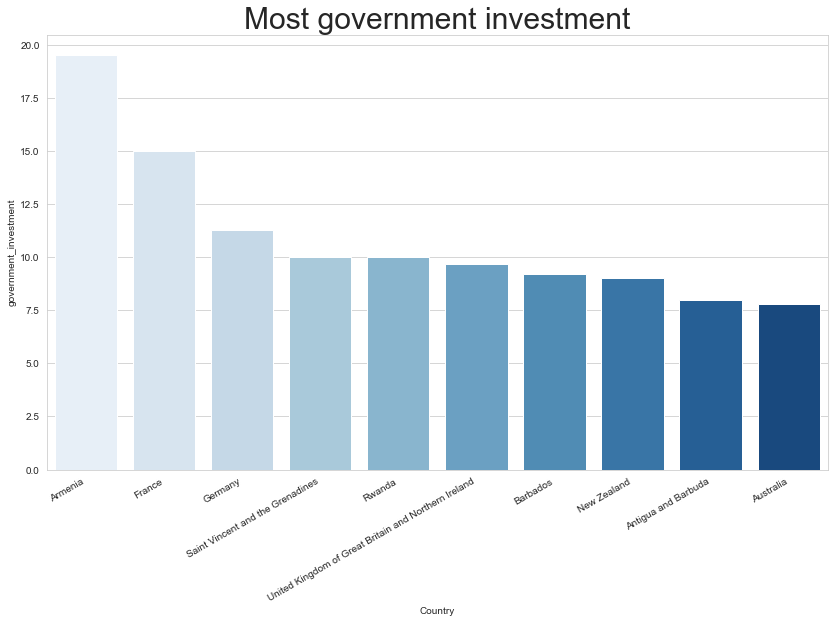

In [9]:
plt.figure(figsize=(14,8))
co = sns.barplot(
    x = 'Country', 
    y = 'government_investment', 
    data = most_contribution, 
    palette = 'Blues')
sns.set_style("whitegrid")
co.axes.set_title("Most government investment",fontsize=30)
a = co.set_xticklabels(co.get_xticklabels(), rotation=390, horizontalalignment='right')
fig = co.get_figure()
fig.savefig('graphics/gob_invest')


## This show how throth the time the invest is increased

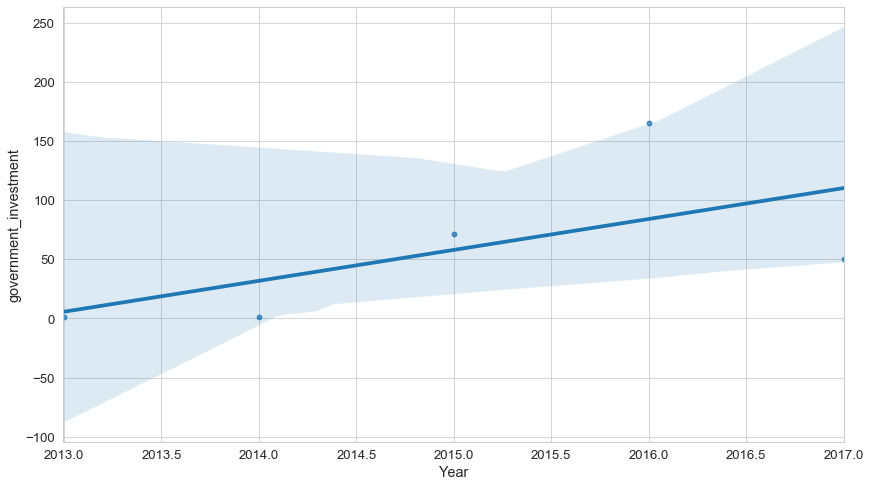

In [10]:
re = df.rename(columns={'Government expenditures on mental hospitals as a percentage of total government expenditures on mental health (%)':
                            'government_investment'}) 
total_inv = re.groupby(['Year'])['government_investment'].sum().reset_index()
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.regplot(y="government_investment", x="Year", data=total_inv)
fig = ax.get_figure()
fig.savefig('graphics/invest_time')


In [11]:
law = df.rename(columns={'Government expenditures on mental hospitals as a percentage of total government expenditures on mental health (%)':
                            'government_investment',
                        'Publication year of the policy or plan (latest revision)': 'publics_laws'}) 
#ley = law.dropna(subset=['Stand-alone law for mental health'], how='all')
law = law[law['Stand-alone law for mental health'] == 'Yes']
print('Stand-alone law for mental health')
law['Stand-alone law for mental health'].count()

Stand-alone law for mental health


208

In [ ]:
df = pd.read_csv('./data_health/dataa.csv')

df.head()